<a href="https://colab.research.google.com/github/WittmannF/distribuicao-normal-moedas/blob/master/ModelandoDistribui%C3%A7%C3%A3oNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelando uma distribuição normal jogando moedas
Neste post vamos modelar alguns conceitos basicos de estatística através de um dos modelos mais clássicos aleatórios: jogar moedas. Funções aleatórias são extremamente importantes para algoritmos de machine learning. Muitos tomam vantagem de tais funções aleatórias para adicionar um fator exploratório em seu algoritmo. Random Forest fazem uso de seleções aleatórias de atributos e elementos para criar diferentes árvores de decisão e desta forma evitar overfitting. Em redes neurais, overfitting também é evitado graças à aleatoriedade quando utilizamos camadas do tipo Dropout no qual aleatoriamente desativam uma certa porção dos neurônios. Algoritmos de aprendizagem de reforço também fazem uso de algoritmos aleatórios para inicialmente quando estão explorando o ambiente para a escolha de sua próxia ação. E por aí vai. Para começar, vamos criar um modelo bem simples que para tirar cara ou coroa:

In [0]:
import random
id_para_moeda = {0: 'coroa', 1: 'cara'}
moeda_para_id = {'coroa': 0, 'cara': 1}
def jogar_moeda():
    return  id_para_moeda[random.randint(0,1)]


Vamos agora testar:

In [0]:
jogar_moeda()

'coroa'

Como as chances de retornar cara e coroa são as mesmas, temos que quando a moeda é jogada sequencialmente, a tendência é de que metade das vezes sairá cara e metade das vezes sairá coroa. Vamos testar jogar sequencialmente 10 vezes:

In [0]:
for i in range(10):
    print(jogar_moeda())

coroa
cara
cara
coroa
cara
cara
cara
coroa
coroa
cara


Temos aqui 4 caras e 6 coroas. A pequena discrepância entra dentro do desvio padrão, como vamos confirmar em breve. 
Vamos agora testar jogar esta moeda 100 vezes seguidas e contar o número de caras e coroas.

In [0]:
def jogar_n_vezes(n=100, imprimir=True):
    if imprimir:
        print(f'Jogando moeda {n} vezes\n')
    resultados = []
    for i in range(n):
        resultados.append(moeda_para_id[jogar_moeda()])
    
    n_caras = sum(resultados)
    n_coroas = n-n_caras
    if imprimir:
        print(f'Resultado\ncara - {n_caras} vezes\ncoroa - {n_coroas} vezes')
    return resultados, n_caras, n_coroas

_=jogar_n_vezes()

Jogando moeda 100 vezes

Resultado
cara - 42 vezes
coroa - 58 vezes


Novamente temos proximidades à 50 de cada lado. Vamos agora testar jogar estas moedas sequencialmente por 1000 rodadas e plotar em um histograma a frequencia de caras destas rodadas:

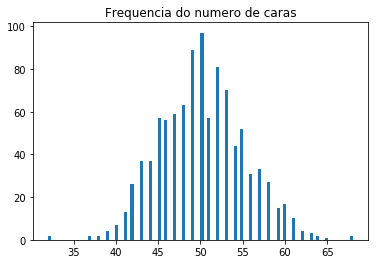

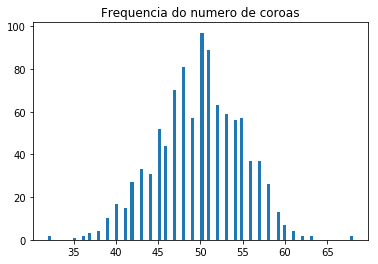

In [0]:
import matplotlib.pyplot as plt
numero_de_rodadas = 1000
jogadas_por_rodada = 100

n_caras_rodada = []
n_coroas_rodada = []

for rodada in range(numero_de_rodadas):
    _, n_caras, n_coroas = jogar_n_vezes(jogadas_por_rodada, False)
    n_caras_rodada.append(n_caras)
    n_coroas_rodada.append(n_coroas)

_ = plt.hist(n_caras_rodada, 100)
plt.title('Frequencia do numero de caras')
plt.show()

_ = plt.hist(n_coroas_rodada, 100)
plt.title('Frequencia do numero de coroas')
plt.show()

Pronto, chegamos aqui ao que chamamos distribuição normal. Visualmente, temos que o número de vezes que caiu cara foi 50 (centro do gráfico). Temos também que as regiões mais extremas e improváveis, o número de caras/coroas diminui. Temos que das 1000 rodadas, o menor número de coroas ocorridas foi 35 e o maior número foi 67. Vamos agora calcular algumas estatísticas:

In [0]:
import numpy as np
caras_avg = np.mean(n_caras_rodada)
caras_std = np.std(n_caras_rodada)
coroas_avg = np.mean(n_coroas_rodada)
coroas_std = np.std(n_coroas_rodada)

print(f'Média de caras: {caras_avg}')
print(f'Média de coroas: {coroas_avg}')
print(f'Desvio padrão de caras {caras_std:.2f}')
print(f'Desvio padrão de coroas {coroas_std:.2f}')

Média de caras: 50.172
Média de coroas: 49.828
Desvio padrão de caras 5.04
Desvio padrão de coroas 5.04


Conforme esperado, a média do número de coroas retornadas destas 1000 rodadas foi 50 vezes (ou seja, em média cairam 50 vezes caras). Quanto ao desvio padrão, vamos recapitular um pouco a partir da seguinte imagem (do [wikipedia](https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg)):

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/500px-Standard_deviation_diagram.svg.png)

Temos que 34.1+34.1 = 68.2% dos casos está dentro da região entre a média - desvio padrão e média + desvio padrão. Isso quer dizer que 68% das vezes o número de vezes que retornou cara/coroa está entre 50-5 = 45 e 50+5 = 55. Podemos também dizer que temos 68% de confiança de que o número de vezes que caiu cara está entre 45 e 55. Para uma precisão maior, temos 2 sigmas, que representam 13.6% adicionais em cada extremo. Ou seja, 68.2+2*13.6=95.4% das vezes, o número de vezes que retornou cara/coroa está entre 40 e 60. Em outras palavras, podemos dizer que temos 95% de confiança de que o número de vezes que caiu coroa está entre 40 e 60. Vamos confirmar estas informações:


In [0]:
cara_entre_45_e_55 = sum(45<=n<=55 for n in n_caras_rodada)
cara_entre_40_e_60 = sum(40<=n<=60 for n in n_caras_rodada)
coroa_entre_45_e_55 = sum(45<=n<=55 for n in n_coroas_rodada)
coroa_entre_40_e_60 = sum(40<=n<=60 for n in n_coroas_rodada)

print(f'Número de rodadas: {numero_de_rodadas}')
print(f'Número de jogadas de moeda por rodada {jogadas_por_rodada}')
print(f'Quantidade de rodadas que caíram cara entre 45 e 55 vezes: {cara_entre_45_e_55}')
print(f'Quantidade de rodadas que caíram cara entre 40 e 60 vezes: {cara_entre_40_e_60}')
print(f'Quantidade de rodadas que caíram coroa entre 45 e 55 vezes: {coroa_entre_45_e_55}')
print(f'Quantidade de rodadas que caíram coroa entre 40 e 60 vezes: {coroa_entre_40_e_60}')

Número de rodadas: 1000
Número de jogadas de moeda por rodada 100
Quantidade de rodadas que caíram cara entre 45 e 55 vezes: 725
Quantidade de rodadas que caíram cara entre 40 e 60 vezes: 968
Quantidade de rodadas que caíram coroa entre 45 e 55 vezes: 725
Quantidade de rodadas que caíram coroa entre 40 e 60 vezes: 968


Portanto, nossa experiência superou o grau de confiança previamente definido: 72% das vezes caiu cara dentro do intervalo de mais ou menos um desvio padrão e 96% das vezes caiu dentro do intervado de mais ou menos 2 desvios padrões. Portanto está acima da confiança definida acima.